In [1]:
import sys
import os

import numpy as np
import skimage as sk
from skimage import io
from skimage import segmentation
import higra as hg
import h5py

%matplotlib inline
from matplotlib import pyplot as plt

import data.datasets.I3 as I3
import data.datasets.LW4 as LW4

'''
color_1 = (0/255, 160/255, 115/255)
color_2 = (85/255, 180/255, 235/255)
color_3 = (210/255, 95/255, 0/255)
'''
color_1 = (0.0, 0.8, 0.0)
color_2 = (0.0, 0.0, 1.0)
color_3 = (1.0, 0.0, 0.0)

In [2]:
def save_segmentation_only_border(image, label, label_color, filename):
    patch_clean_border = segmentation.clear_border(label)
    plt.imshow(segmentation.mark_boundaries(image, label, color=label_color, mode="thick"))
    plt.axis('off')
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename, bbox_inches='tight', pad_inches = 0)

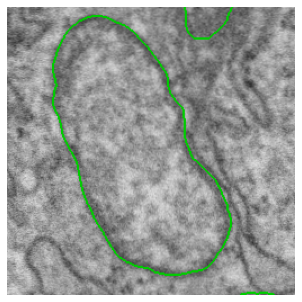

In [3]:
p_x = 1150
p_y = 750
p_z = 0

patch_image = I3.train_i3_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = I3.train_i3_label_1[p_z, p_y:p_y+256, p_x:p_x+256]

save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_patch_i3_c1.svg")

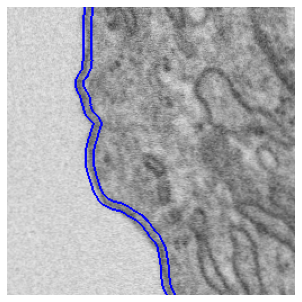

In [4]:
p_x = 1000
p_y = 900
p_z = 0

patch_image = I3.train_i3_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = I3.train_i3_label_2[p_z, p_y:p_y+256, p_x:p_x+256]

save_segmentation_only_border(patch_image, patch_mask, color_2, "figures/example_patch_i3_c2.svg")

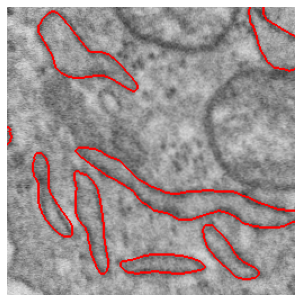

In [5]:
p_x = 1140
p_y = 950
p_z = 0

patch_image = I3.train_i3_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = I3.train_i3_label_3[p_z, p_y:p_y+256, p_x:p_x+256]

save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_patch_i3_c3.svg")

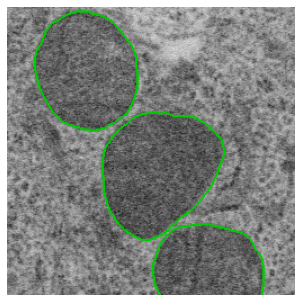

In [6]:
p_x = 500
p_y = 470
p_z = 0

patch_image = LW4.train_lw4_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = LW4.train_lw4_label_1[p_z, p_y:p_y+256, p_x:p_x+256]

save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_patch_lw4_c1.svg")

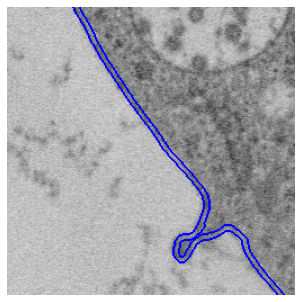

In [7]:
p_x = 230
p_y = 850
p_z = 0

patch_image = LW4.train_lw4_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = LW4.train_lw4_label_2[p_z, p_y:p_y+256, p_x:p_x+256]

save_segmentation_only_border(patch_image, patch_mask, color_2, "figures/example_patch_lw4_c2.svg")

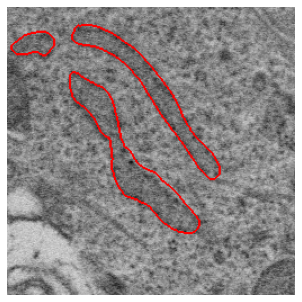

In [8]:
p_x = 320
p_y = 120
p_z = 0

patch_image = LW4.train_lw4_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = LW4.train_lw4_label_3[p_z, p_y:p_y+256, p_x:p_x+256]

save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_patch_lw4_c3.svg")

# Morpho

In [9]:
lambda_1 = 650
lambda_2 = 3200

In [10]:
def save_segmentation_only_border_3l(image, label, filename):
    if len(label) != 3:
        return
    patch_clean_border = segmentation.clear_border(label[0])
    patch_clean_border = segmentation.clear_border(label[1])
    patch_clean_border = segmentation.clear_border(label[2])
    tmp = segmentation.mark_boundaries(image, label[0], color=color_1, mode="thick")
    tmp = segmentation.mark_boundaries(tmp, label[1], color=color_2, mode="thick")
    tmp = segmentation.mark_boundaries(tmp, label[2], color=color_3, mode="thick")
    plt.imshow(tmp)
    plt.axis('off')
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename, bbox_inches='tight', pad_inches = 0)

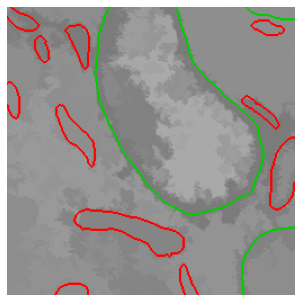

In [11]:
p_x = 1100
p_y = 800
p_z = 10
patch_image = I3.train_i3_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = [I3.train_i3_label_1[p_z, p_y:p_y+256, p_x:p_x+256], I3.train_i3_label_2[p_z, p_y:p_y+256, p_x:p_x+256], I3.train_i3_label_3[p_z, p_y:p_y+256, p_x:p_x+256]]

tree, altitudes = hg.component_tree_tree_of_shapes_image2d(patch_image)
area = hg.attribute_area(tree)
patch_image_lambda_1 = hg.reconstruct_leaf_data(tree, altitudes, area < lambda_1)
patch_image_lambda_2 = hg.reconstruct_leaf_data(tree, altitudes, area < lambda_2)

save_segmentation_only_border_3l(patch_image, patch_mask, "figures/example_patch_i3_multi_morpho_0.svg")
save_segmentation_only_border_3l(patch_image_lambda_1, patch_mask, "figures/example_patch_i3_multi_morpho_650.svg")
save_segmentation_only_border_3l(patch_image_lambda_2, patch_mask, "figures/example_patch_i3_multi_morpho_3200.svg")

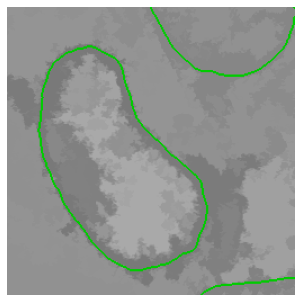

In [12]:
p_x = 1150
p_y = 750
p_z = 10
patch_image = I3.train_i3_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = I3.train_i3_label_1[p_z, p_y:p_y+256, p_x:p_x+256]

tree, altitudes = hg.component_tree_tree_of_shapes_image2d(patch_image)
area = hg.attribute_area(tree)
patch_image_lambda_1 = hg.reconstruct_leaf_data(tree, altitudes, area < lambda_1)
patch_image_lambda_2 = hg.reconstruct_leaf_data(tree, altitudes, area < lambda_2)

save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_patch_i3_c1_morpho_0.svg")
save_segmentation_only_border(patch_image_lambda_1, patch_mask, color_1, "figures/example_patch_i3_c1_morpho_650.svg")
save_segmentation_only_border(patch_image_lambda_2, patch_mask, color_1, "figures/example_patch_i3_c1_morpho_3200.svg")

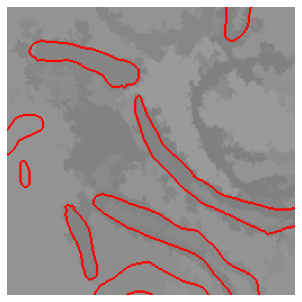

In [13]:
p_x = 1140
p_y = 950
p_z = 10

patch_image = I3.train_i3_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = I3.train_i3_label_3[p_z, p_y:p_y+256, p_x:p_x+256]

tree, altitudes = hg.component_tree_tree_of_shapes_image2d(patch_image)
area = hg.attribute_area(tree)
patch_image_lambda_1 = hg.reconstruct_leaf_data(tree, altitudes, area < lambda_1)
patch_image_lambda_2 = hg.reconstruct_leaf_data(tree, altitudes, area < lambda_2)

save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_patch_i3_c3_morpho_0.svg")
save_segmentation_only_border(patch_image_lambda_1, patch_mask, color_3, "figures/example_patch_i3_c3_morpho_650.svg")
save_segmentation_only_border(patch_image_lambda_2, patch_mask, color_3, "figures/example_patch_i3_c3_morpho_3200.svg")

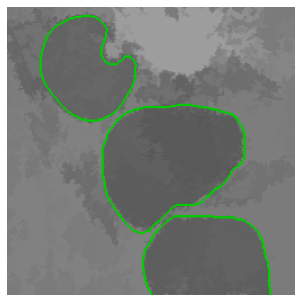

In [14]:
p_x = 500
p_y = 470
p_z = 10
patch_image = LW4.train_lw4_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = LW4.train_lw4_label_1[p_z, p_y:p_y+256, p_x:p_x+256]

tree, altitudes = hg.component_tree_tree_of_shapes_image2d(patch_image)
area = hg.attribute_area(tree)
patch_image_lambda_1 = hg.reconstruct_leaf_data(tree, altitudes, area < lambda_1)
patch_image_lambda_2 = hg.reconstruct_leaf_data(tree, altitudes, area < lambda_2)

save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_patch_lw4_c1_morpho_0.svg")
save_segmentation_only_border(patch_image_lambda_1, patch_mask, color_1, "figures/example_patch_lw4_c1_morpho_650.svg")
save_segmentation_only_border(patch_image_lambda_2, patch_mask, color_1, "figures/example_patch_lw4_c1_morpho_3200.svg")

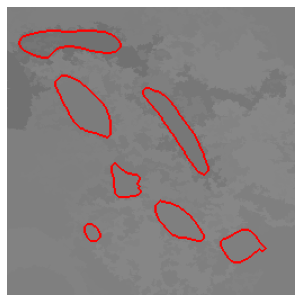

In [15]:
p_x = 320
p_y = 120
p_z = 10
patch_image = LW4.train_lw4_image_normalized_f32[p_z, p_y:p_y+256, p_x:p_x+256]
patch_mask = LW4.train_lw4_label_3[p_z, p_y:p_y+256, p_x:p_x+256]

tree, altitudes = hg.component_tree_tree_of_shapes_image2d(patch_image)
area = hg.attribute_area(tree)
patch_image_lambda_1 = hg.reconstruct_leaf_data(tree, altitudes, area < lambda_1)
patch_image_lambda_2 = hg.reconstruct_leaf_data(tree, altitudes, area < lambda_2)

save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_patch_lw4_c3_morpho_0.svg")
save_segmentation_only_border(patch_image_lambda_1, patch_mask, color_3, "figures/example_patch_lw4_c3_morpho_650.svg")
save_segmentation_only_border(patch_image_lambda_2, patch_mask, color_3, "figures/example_patch_lw4_c3_morpho_3200.svg")

# Results

In [16]:
# 2nd expert
# i3_image[239] = I3.test_i3_image_normalized_f32[8]
# i3_image[109] = LW4.test_lw4_image_normalized_f32[9]

e2_i3_label_1 = np.array(
    sk.io.imread("/home/cyril/Documents/Data/MEYER_ISBI_2021/EXPERT_2/Labels_i3_Mito_240_E2.tif"))[239]
e2_i3_label_2 = np.array(
    sk.io.imread("/home/cyril/Documents/Data/MEYER_ISBI_2021/EXPERT_2/Labels_i3_Cell_240_E2.tif"))[239]
e2_i3_label_3 = np.array(
    sk.io.imread("/home/cyril/Documents/Data/MEYER_ISBI_2021/EXPERT_2/Labels_i3_Reti_240_E2.tif"))[239]

e2_lw4_label_1 = np.array(
    sk.io.imread("/home/cyril/Documents/Data/MEYER_ISBI_2021/EXPERT_2/Labels_LW4-600_110_Mito_E2.tif"))[109]
e2_lw4_label_2 = np.array(
    sk.io.imread("/home/cyril/Documents/Data/MEYER_ISBI_2021/EXPERT_2/Labels_LW4-600_110_Cell_E2.tif"))[109]
e2_lw4_label_3 = np.array(
    sk.io.imread("/home/cyril/Documents/Data/MEYER_ISBI_2021/EXPERT_2/Labels_LW4-600_110_Reti_E2.tif"))[109]

# Ours
pred_i3_labels = np.load("results/I_2021_256_1_2_1_3200_650_1627262476.npy")
pred_lw4_labels = np.load("results/I_2021_256_2_2_0_0926302336.npy")

# Ilastik
test_ila_i3_labels_proba = h5py.File('/home/cyril/Documents/Data/ALL_ANNOTATED_STACKS/TEST_I3_IMAGE_NORMALIZED_F32_Probabilities.h5', 'r')['exported_data']
test_ila_lw4_labels_proba = h5py.File('/home/cyril/Documents/Data/ALL_ANNOTATED_STACKS/TEST_LW4_IMAGE_NORMALIZED_F32_Probabilities.h5', 'r')['exported_data']

In [17]:
pred_valid_i3_labels = pred_i3_labels[0:20]
pred_test_i3_labels = pred_i3_labels[20:]
pred_valid_lw4_labels = pred_lw4_labels[0:20]
pred_test_lw4_labels = pred_lw4_labels[20:]

test_pre_i3_label_1 = (pred_test_i3_labels==1)*1
test_pre_i3_label_2 = (pred_test_i3_labels==2)*1
test_pre_i3_label_3 = (pred_test_i3_labels==3)*1

test_pre_lw4_label_1 = (pred_test_lw4_labels==1)*1
test_pre_lw4_label_2 = (pred_test_lw4_labels==2)*1
test_pre_lw4_label_3 = (pred_test_lw4_labels==3)*1

test_ila_i3_labels = np.argmax(test_ila_i3_labels_proba, axis=-1)
test_ila_i3_label_1 = (test_ila_i3_labels==0)*1
test_ila_i3_label_2 = (test_ila_i3_labels==1)*1
test_ila_i3_label_3 = (test_ila_i3_labels==2)*1

test_ila_lw4_labels = np.argmax(test_ila_lw4_labels_proba, axis=-1)
test_ila_lw4_label_1 = (test_ila_lw4_labels==0)*1
test_ila_lw4_label_2 = (test_ila_lw4_labels==1)*1
test_ila_lw4_label_3 = (test_ila_lw4_labels==2)*1

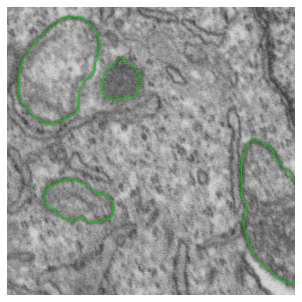

In [18]:
p_x = 1280
p_y = 840
p_z = 8
patch_image = I3.test_i3_image_normalized_f32[p_z, p_y:p_y+500, p_x:p_x+500]
patch_mask = I3.test_i3_label_1[p_z, p_y:p_y+500, p_x:p_x+500]

save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_segmentation_i3_c1_gd.svg")

patch_mask = test_pre_i3_label_1[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_segmentation_i3_c1_ours.svg")

patch_mask = test_ila_i3_label_1[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_segmentation_i3_c1_ilastik.svg")

patch_mask = e2_i3_label_1[p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_segmentation_i3_c1_expert2.svg")

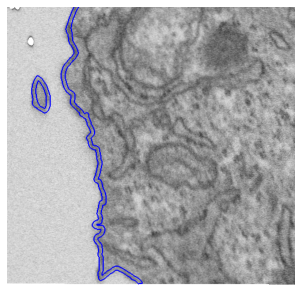

In [19]:
p_x = 1100
p_y = 900
p_z = 8
patch_image = I3.test_i3_image_normalized_f32[p_z, p_y:p_y+500, p_x:p_x+500]
patch_mask = I3.test_i3_label_2[p_z, p_y:p_y+500, p_x:p_x+500]

save_segmentation_only_border(patch_image, patch_mask, color_2, "figures/example_segmentation_i3_c2_gd.svg")

patch_mask = test_pre_i3_label_2[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_2, "figures/example_segmentation_i3_c2_ours.svg")

patch_mask = test_ila_i3_label_2[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_2, "figures/example_segmentation_i3_c2_ilastik.svg")

patch_mask = e2_i3_label_2[p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_2, "figures/example_segmentation_i3_c2_expert2.svg")

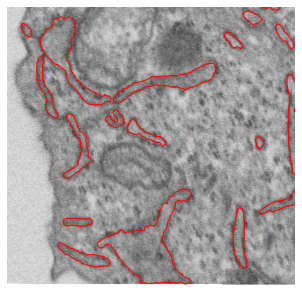

In [20]:
p_x = 1180
p_y = 900
p_z = 8
patch_image = I3.test_i3_image_normalized_f32[p_z, p_y:p_y+500, p_x:p_x+500]
patch_mask = I3.test_i3_label_3[p_z, p_y:p_y+500, p_x:p_x+500]

save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_segmentation_i3_c3_gd.svg")

patch_mask = test_pre_i3_label_3[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_segmentation_i3_c3_ours.svg")

patch_mask = test_ila_i3_label_3[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_segmentation_i3_c3_ilastik.svg")

patch_mask = e2_i3_label_3[p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_segmentation_i3_c3_expert2.svg")

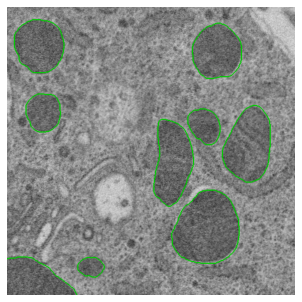

In [21]:
p_x = 1050
p_y = 40
p_z = 9
patch_image = LW4.test_lw4_image_normalized_f32[p_z, p_y:p_y+500, p_x:p_x+500]
patch_mask = LW4.test_lw4_label_1[p_z, p_y:p_y+500, p_x:p_x+500]

save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_segmentation_lw4_c1_gd.svg")

patch_mask = test_pre_lw4_label_1[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_segmentation_lw4_c1_ours.svg")

patch_mask = test_ila_lw4_label_1[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_segmentation_lw4_c1_ilastik.svg")

patch_mask = e2_lw4_label_1[p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_1, "figures/example_segmentation_lw4_c1_expert2.svg")

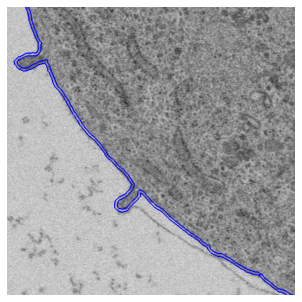

In [22]:
p_x = 200
p_y = 700
p_z = 9
patch_image = LW4.test_lw4_image_normalized_f32[p_z, p_y:p_y+500, p_x:p_x+500]
patch_mask = LW4.test_lw4_label_2[p_z, p_y:p_y+500, p_x:p_x+500]

save_segmentation_only_border(patch_image, patch_mask, color_2, "figures/example_segmentation_lw4_c2_gd.svg")

patch_mask = test_pre_lw4_label_2[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_2, "figures/example_segmentation_lw4_c2_ours.svg")

patch_mask = test_ila_lw4_label_2[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_2, "figures/example_segmentation_lw4_c2_ilastik.svg")

patch_mask = e2_lw4_label_2[p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_2, "figures/example_segmentation_lw4_c2_expert2.svg")

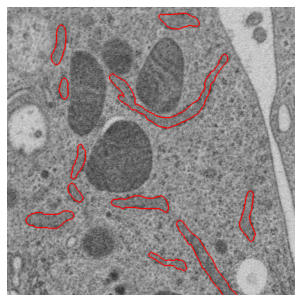

In [23]:
p_x = 1200
p_y = 160
p_z = 9
patch_image = LW4.test_lw4_image_normalized_f32[p_z, p_y:p_y+500, p_x:p_x+500]
patch_mask = LW4.test_lw4_label_3[p_z, p_y:p_y+500, p_x:p_x+500]

save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_segmentation_lw4_c3_gd.svg")

patch_mask = test_pre_lw4_label_3[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_segmentation_lw4_c3_ours.svg")

patch_mask = test_ila_lw4_label_3[p_z, p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_segmentation_lw4_c3_ilastik.svg")

patch_mask = e2_lw4_label_3[p_y:p_y+500, p_x:p_x+500]
save_segmentation_only_border(patch_image, patch_mask, color_3, "figures/example_segmentation_lw4_c3_expert2.svg")